In [65]:
#'https://www.kompas.com/sains/read/2021/03/01/203000423/peringatan-dini-gelombang-tinggi-4-meter-ini-daftar-wilayahnya?page=all#page2'

In [92]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup as bs

# Proses WebScrapping - Text mining

In [93]:
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36'
headers = {'User-Agent': user_agent,'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*,q=0.8'}
alamat = 'https://www.kompas.com/sains/read/2021/03/01/203000423/peringatan-dini-gelombang-tinggi-4-meter-ini-daftar-wilayahnya?page=all#page2'

In [94]:
req = Request(alamat,headers=headers)
html = urlopen(req)

In [95]:
data = bs(html,'html.parser')
artikel = data.find('div',{'class':'read__content'})

In [96]:
print(artikel.get_text())


KOMPAS.com - Badan Meteorologi, Klimatologi dan Geofisika (BMKG) kembali merilis peringatan dini  potensi gelombang tinggi dalam dua hari ini, 1-2 Maret 2021.
Berdasarkan analisis BMKG,  gelombang tinggi ini berpeluang terjadi hingga mencapai empat meter di sejumlah wilayah perairan Indonesia, akibat beberapa pemicu.
Pertama, siklon tropis Marian.
Disebutkan bahwa siklon tropis Marian ini terdapat di Samudera Hindia barat daya Lampung yang berdampak pada ketinggian gelombang di Samudra Hindia barat daya Lampung dan selatan Banten. 
Baca juga: Waspada Gelombang Tinggi 6 Meter 3 Hari ke Depan akibat Tropical Storm Dujuan 998
Kedua, pola angin.
Pola angin di wilayah Indonesia bagian utara pada umumnya bergerak dari barat laut - timur laut dengan kecepatan angin berkisar 5-20 knot.
Sedangkan, di wilayah Indonesia bagian selatan umumnya bergerak dari barat daya - barat laut  dengan kecepatan angin berkisar 5 - 25 knot. 
Ketiga, kecepatan angin.
Kecepatan angin tertinggi terpantau di Selat 

In [97]:
hidelabel = artikel.findAll('strong')
hidelabel

[<strong>KOMPAS.com</strong>,
 <strong>Pertama, siklon tropis Marian.</strong>,
 <strong>Baca juga: <a class="inner-link-baca-juga" href="https://www.kompas.com/sains/read/2021/02/22/193000223/waspada-gelombang-tinggi-6-meter-3-hari-ke-depan-akibat-tropical-storm" target="_self">Waspada Gelombang Tinggi 6 Meter 3 Hari ke Depan akibat Tropical Storm Dujuan 998</a></strong>,
 <strong>Kedua, pola angin.</strong>,
 <strong>Ketiga, kecepatan angin.</strong>,
 <strong> <a class="inner-link-tag" href="https://www.kompas.com/tag/gelombang-tinggi" style="color:#428bca;" target="_self">Gelombang tinggi</a> 1,25- 2,50 meter (kategori sedang)</strong>,
 <strong>Baca juga: <a class="inner-link-baca-juga" href="https://www.kompas.com/sains/read/2021/02/06/165222023/wilayah-waspada-cuaca-ekstrem-hujan-lebat-hingga-gelombang-tinggi" target="_self">Wilayah Waspada Cuaca Ekstrem, Hujan Lebat hingga Gelombang Tinggi</a></strong>,
 <strong><div class="photo" data-photolink="http://www.kompas.com/sains/ima

In [98]:
for kata in hidelabel:
    kata.decompose()

In [99]:
items = artikel.findAll('p')
hasil = [item.get_text() for item in items]
hasil


[' - Badan Meteorologi, Klimatologi dan Geofisika (BMKG) kembali merilis peringatan dini  potensi gelombang tinggi dalam dua hari ini, 1-2 Maret 2021.',
 'Berdasarkan analisis BMKG,  gelombang tinggi ini berpeluang terjadi hingga mencapai empat meter di sejumlah wilayah perairan Indonesia, akibat beberapa pemicu.',
 '',
 'Disebutkan bahwa siklon tropis Marian ini terdapat di Samudera Hindia barat daya Lampung yang berdampak pada ketinggian gelombang di Samudra Hindia barat daya Lampung dan selatan Banten.\xa0',
 '',
 '',
 'Pola angin di wilayah Indonesia bagian utara pada umumnya bergerak dari barat laut - timur laut dengan kecepatan angin berkisar 5-20 knot.',
 'Sedangkan, di wilayah Indonesia bagian selatan umumnya bergerak dari barat daya - barat laut\xa0 dengan kecepatan angin berkisar 5 - 25 knot.\xa0',
 '',
 'Kecepatan angin tertinggi terpantau di Selat Makassar bagian selatan, Perairan barat Sulawesi selatan, Laut Flores, Teluk Bone, Laut Banda bagian barat, Laut Arafuru bagian 

# Proses Case Folding ((tanda baca, pengecilan huruf, dan angka))

In [100]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Lowercase (Mengubah text menjadi lowercase)

In [102]:
result = [item.lower() for item in hasil]
result

[' - badan meteorologi, klimatologi dan geofisika (bmkg) kembali merilis peringatan dini  potensi gelombang tinggi dalam dua hari ini, 1-2 maret 2021.',
 'berdasarkan analisis bmkg,  gelombang tinggi ini berpeluang terjadi hingga mencapai empat meter di sejumlah wilayah perairan indonesia, akibat beberapa pemicu.',
 '',
 'disebutkan bahwa siklon tropis marian ini terdapat di samudera hindia barat daya lampung yang berdampak pada ketinggian gelombang di samudra hindia barat daya lampung dan selatan banten.\xa0',
 '',
 '',
 'pola angin di wilayah indonesia bagian utara pada umumnya bergerak dari barat laut - timur laut dengan kecepatan angin berkisar 5-20 knot.',
 'sedangkan, di wilayah indonesia bagian selatan umumnya bergerak dari barat daya - barat laut\xa0 dengan kecepatan angin berkisar 5 - 25 knot.\xa0',
 '',
 'kecepatan angin tertinggi terpantau di selat makassar bagian selatan, perairan barat sulawesi selatan, laut flores, teluk bone, laut banda bagian barat, laut arafuru bagian 

In [145]:
hasil = result.copy()

# Tokenizing

##  Menghapus angka, Special Characters, dan Simbol

In [146]:
# import re

# def remove_special_characters(text, remove_digits=False):
#     pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
#     text = re.sub(pattern, '', text)
#     return text

In [147]:
hasil = [item.lower() for item in hasil]
hasil = [' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", item).split()) for item in hasil]
hasil = ' '.join(hasil)

In [148]:
print(hasil)

badan meteorologi klimatologi dan geofisika bmkg kembali merilis peringatan dini potensi gelombang tinggi dalam dua hari ini 1 2 maret 2021 berdasarkan analisis bmkg gelombang tinggi ini berpeluang terjadi hingga mencapai empat meter di sejumlah wilayah perairan indonesia akibat beberapa pemicu  disebutkan bahwa siklon tropis marian ini terdapat di samudera hindia barat daya lampung yang berdampak pada ketinggian gelombang di samudra hindia barat daya lampung dan selatan banten   pola angin di wilayah indonesia bagian utara pada umumnya bergerak dari barat laut timur laut dengan kecepatan angin berkisar 5 20 knot sedangkan di wilayah indonesia bagian selatan umumnya bergerak dari barat daya barat laut dengan kecepatan angin berkisar 5 25 knot  kecepatan angin tertinggi terpantau di selat makassar bagian selatan perairan barat sulawesi selatan laut flores teluk bone laut banda bagian barat laut arafuru bagian timur perairan selatan merauke kondisi kondisi inilah yang mengakibatkan tingg

In [134]:
# hasil = remove_special_characters(str(hasil),remove_digits=True)
# hasil

In [149]:
len(hasil)

2956

## Menghilangkan whitespace 

In [150]:
hasil = hasil.strip()
hasil

'badan meteorologi klimatologi dan geofisika bmkg kembali merilis peringatan dini potensi gelombang tinggi dalam dua hari ini 1 2 maret 2021 berdasarkan analisis bmkg gelombang tinggi ini berpeluang terjadi hingga mencapai empat meter di sejumlah wilayah perairan indonesia akibat beberapa pemicu  disebutkan bahwa siklon tropis marian ini terdapat di samudera hindia barat daya lampung yang berdampak pada ketinggian gelombang di samudra hindia barat daya lampung dan selatan banten   pola angin di wilayah indonesia bagian utara pada umumnya bergerak dari barat laut timur laut dengan kecepatan angin berkisar 5 20 knot sedangkan di wilayah indonesia bagian selatan umumnya bergerak dari barat daya barat laut dengan kecepatan angin berkisar 5 25 knot  kecepatan angin tertinggi terpantau di selat makassar bagian selatan perairan barat sulawesi selatan laut flores teluk bone laut banda bagian barat laut arafuru bagian timur perairan selatan merauke kondisi kondisi inilah yang mengakibatkan ting

In [151]:
len(hasil)

2955

## Tokenize kata

In [152]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.probability import FreqDist

In [153]:
word_hasil = word_tokenize(hasil)
print(word_hasil)

['badan', 'meteorologi', 'klimatologi', 'dan', 'geofisika', 'bmkg', 'kembali', 'merilis', 'peringatan', 'dini', 'potensi', 'gelombang', 'tinggi', 'dalam', 'dua', 'hari', 'ini', '1', '2', 'maret', '2021', 'berdasarkan', 'analisis', 'bmkg', 'gelombang', 'tinggi', 'ini', 'berpeluang', 'terjadi', 'hingga', 'mencapai', 'empat', 'meter', 'di', 'sejumlah', 'wilayah', 'perairan', 'indonesia', 'akibat', 'beberapa', 'pemicu', 'disebutkan', 'bahwa', 'siklon', 'tropis', 'marian', 'ini', 'terdapat', 'di', 'samudera', 'hindia', 'barat', 'daya', 'lampung', 'yang', 'berdampak', 'pada', 'ketinggian', 'gelombang', 'di', 'samudra', 'hindia', 'barat', 'daya', 'lampung', 'dan', 'selatan', 'banten', 'pola', 'angin', 'di', 'wilayah', 'indonesia', 'bagian', 'utara', 'pada', 'umumnya', 'bergerak', 'dari', 'barat', 'laut', 'timur', 'laut', 'dengan', 'kecepatan', 'angin', 'berkisar', '5', '20', 'knot', 'sedangkan', 'di', 'wilayah', 'indonesia', 'bagian', 'selatan', 'umumnya', 'bergerak', 'dari', 'barat', 'daya',

# STOPWORDS

In [156]:
from nltk.corpus import stopwords

In [157]:
list_stopwords = set(stopwords.words('indonesian'))

In [160]:
test = [word for word in word_hasil if not word in list_stopwords]
print(test)

['badan', 'meteorologi', 'klimatologi', 'geofisika', 'bmkg', 'merilis', 'peringatan', 'potensi', 'gelombang', '1', '2', 'maret', '2021', 'berdasarkan', 'analisis', 'bmkg', 'gelombang', 'berpeluang', 'mencapai', 'meter', 'wilayah', 'perairan', 'indonesia', 'akibat', 'pemicu', 'siklon', 'tropis', 'marian', 'samudera', 'hindia', 'barat', 'daya', 'lampung', 'berdampak', 'ketinggian', 'gelombang', 'samudra', 'hindia', 'barat', 'daya', 'lampung', 'selatan', 'banten', 'pola', 'angin', 'wilayah', 'indonesia', 'utara', 'bergerak', 'barat', 'laut', 'timur', 'laut', 'kecepatan', 'angin', 'berkisar', '5', '20', 'knot', 'wilayah', 'indonesia', 'selatan', 'bergerak', 'barat', 'daya', 'barat', 'laut', 'kecepatan', 'angin', 'berkisar', '5', '25', 'knot', 'kecepatan', 'angin', 'tertinggi', 'terpantau', 'selat', 'makassar', 'selatan', 'perairan', 'barat', 'sulawesi', 'selatan', 'laut', 'flores', 'teluk', 'bone', 'laut', 'banda', 'barat', 'laut', 'arafuru', 'timur', 'perairan', 'selatan', 'merauke', 'kon

In [163]:
hasil_without_stopword =' '.join(test)

In [164]:
print(hasil_without_stopword)

badan meteorologi klimatologi geofisika bmkg merilis peringatan potensi gelombang 1 2 maret 2021 berdasarkan analisis bmkg gelombang berpeluang mencapai meter wilayah perairan indonesia akibat pemicu siklon tropis marian samudera hindia barat daya lampung berdampak ketinggian gelombang samudra hindia barat daya lampung selatan banten pola angin wilayah indonesia utara bergerak barat laut timur laut kecepatan angin berkisar 5 20 knot wilayah indonesia selatan bergerak barat daya barat laut kecepatan angin berkisar 5 25 knot kecepatan angin tertinggi terpantau selat makassar selatan perairan barat sulawesi selatan laut flores teluk bone laut banda barat laut arafuru timur perairan selatan merauke kondisi kondisi mengakibatkan gelombang mencapai kategori yaiu capai 4 meter wilayah perairan perairan utara sabang perairan barat aceh perairan barat simeuleu kepulauan mentawai perairan barat bengkulu samudra hindia barat aceh kepulauan nias perairan selatan sumbawa pulau sawu selat sumba bara

# Stemming menggunakan Sastrawi

In [166]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [170]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()


list_hasil = test

output   = [(token + " : " + stemmer.stem(token)) for token in list_hasil]


In [169]:
print(output)

['badan : badan', 'meteorologi : meteorologi', 'klimatologi : klimatologi', 'geofisika : geofisika', 'bmkg : bmkg', 'merilis : rilis', 'peringatan : ingat', 'potensi : potensi', 'gelombang : gelombang', '1 : 1', '2 : 2', 'maret : maret', '2021 : 2021', 'berdasarkan : dasar', 'analisis : analisis', 'bmkg : bmkg', 'gelombang : gelombang', 'berpeluang : peluang', 'mencapai : capai', 'meter : meter', 'wilayah : wilayah', 'perairan : air', 'indonesia : indonesia', 'akibat : akibat', 'pemicu : picu', 'siklon : siklon', 'tropis : tropis', 'marian : mari', 'samudera : samudera', 'hindia : hindia', 'barat : barat', 'daya : daya', 'lampung : lampung', 'berdampak : dampak', 'ketinggian : tinggi', 'gelombang : gelombang', 'samudra : samudra', 'hindia : hindia', 'barat : barat', 'daya : daya', 'lampung : lampung', 'selatan : selatan', 'banten : banten', 'pola : pola', 'angin : angin', 'wilayah : wilayah', 'indonesia : indonesia', 'utara : utara', 'bergerak : gerak', 'barat : barat', 'laut : laut', 

In [171]:
final = stemmer.stem(hasil_without_stopword)
print(final)

badan meteorologi klimatologi geofisika bmkg rilis ingat potensi gelombang 1 2 maret 2021 dasar analisis bmkg gelombang peluang capai meter wilayah air indonesia akibat picu siklon tropis mari samudera hindia barat daya lampung dampak tinggi gelombang samudra hindia barat daya lampung selatan banten pola angin wilayah indonesia utara gerak barat laut timur laut cepat angin kisar 5 20 knot wilayah indonesia selatan gerak barat daya barat laut cepat angin kisar 5 25 knot cepat angin tinggi pantau selat makassar selatan air barat sulawesi selatan laut flores teluk bone laut banda barat laut arafuru timur air selatan merauke kondisi kondisi akibat gelombang capai kategori yaiu capai 4 meter wilayah air air utara sabang air barat aceh air barat simeuleu pulau tawa air barat bengkulu samudra hindia barat aceh pulau nias air selatan sumbawa pulau sawu selat sumba barat selat sape selatan air kupang pulau rotte laut sawu samudra hindia selatan pulau sumba pulau rote laut banda air pulau letti 

In [208]:
mostfreq = FreqDist((word_tokenize(final)))
print(mostfreq.most_common())

[('air', 19), ('barat', 18), ('selatan', 12), ('laut', 12), ('pulau', 12), ('gelombang', 11), ('angin', 8), ('cepat', 7), ('meter', 6), ('hindia', 6), ('samudra', 6), ('utara', 6), ('knot', 6), ('selat', 5), ('waspada', 5), ('kapal', 5), ('wilayah', 4), ('lampung', 4), ('timur', 4), ('1', 3), ('capai', 3), ('indonesia', 3), ('daya', 3), ('banten', 3), ('5', 3), ('25', 3), ('halmahera', 3), ('papua', 3), ('bmkg', 2), ('potensi', 2), ('2', 2), ('peluang', 2), ('akibat', 2), ('tinggi', 2), ('gerak', 2), ('kisar', 2), ('sulawesi', 2), ('banda', 2), ('arafuru', 2), ('merauke', 2), ('kondisi', 2), ('4', 2), ('aceh', 2), ('tawa', 2), ('sawu', 2), ('sumba', 2), ('lombok', 2), ('layar', 2), ('badan', 1), ('meteorologi', 1), ('klimatologi', 1), ('geofisika', 1), ('rilis', 1), ('ingat', 1), ('maret', 1), ('2021', 1), ('dasar', 1), ('analisis', 1), ('picu', 1), ('siklon', 1), ('tropis', 1), ('mari', 1), ('samudera', 1), ('dampak', 1), ('pola', 1), ('20', 1), ('pantau', 1), ('makassar', 1), ('flore

In [199]:
finalstor = word_tokenize(final)
finalstor

['badan',
 'meteorologi',
 'klimatologi',
 'geofisika',
 'bmkg',
 'rilis',
 'ingat',
 'potensi',
 'gelombang',
 '1',
 '2',
 'maret',
 '2021',
 'dasar',
 'analisis',
 'bmkg',
 'gelombang',
 'peluang',
 'capai',
 'meter',
 'wilayah',
 'air',
 'indonesia',
 'akibat',
 'picu',
 'siklon',
 'tropis',
 'mari',
 'samudera',
 'hindia',
 'barat',
 'daya',
 'lampung',
 'dampak',
 'tinggi',
 'gelombang',
 'samudra',
 'hindia',
 'barat',
 'daya',
 'lampung',
 'selatan',
 'banten',
 'pola',
 'angin',
 'wilayah',
 'indonesia',
 'utara',
 'gerak',
 'barat',
 'laut',
 'timur',
 'laut',
 'cepat',
 'angin',
 'kisar',
 '5',
 '20',
 'knot',
 'wilayah',
 'indonesia',
 'selatan',
 'gerak',
 'barat',
 'daya',
 'barat',
 'laut',
 'cepat',
 'angin',
 'kisar',
 '5',
 '25',
 'knot',
 'cepat',
 'angin',
 'tinggi',
 'pantau',
 'selat',
 'makassar',
 'selatan',
 'air',
 'barat',
 'sulawesi',
 'selatan',
 'laut',
 'flores',
 'teluk',
 'bone',
 'laut',
 'banda',
 'barat',
 'laut',
 'arafuru',
 'timur',
 'air',
 'selat

In [209]:
df_freq_tokens = pd.DataFrame.from_dict(mostfreq, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

In [215]:
df_freq_tokens.sort_values('Frequency',ascending=False)

,Frequency
Key,
air,19
barat,18
laut,12
selatan,12
pulau,12
...,...
kategori,1
meteorologi,1
bone,1


# WORDCLOUD

In [188]:
from wordcloud import WordCloud as wc

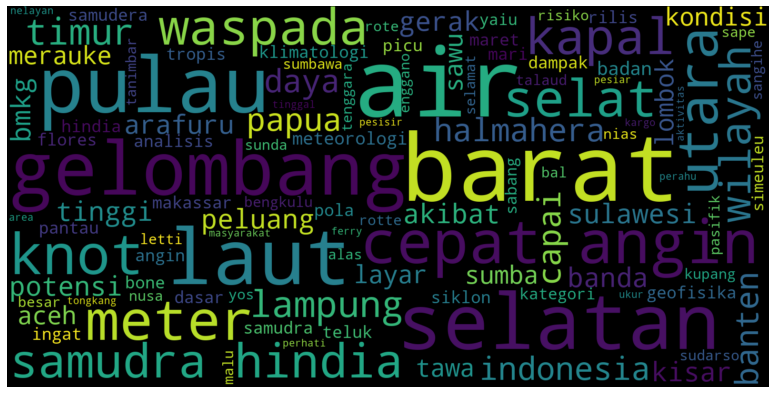

In [190]:
wordcloud = wc(width=1600, height=800, max_font_size=200).generate(final)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Dataframe 

In [220]:
data1 = sent_tokenize(hasil_without_stopword)
data1

['badan meteorologi klimatologi geofisika bmkg merilis peringatan potensi gelombang 1 2 maret 2021 berdasarkan analisis bmkg gelombang berpeluang mencapai meter wilayah perairan indonesia akibat pemicu siklon tropis marian samudera hindia barat daya lampung berdampak ketinggian gelombang samudra hindia barat daya lampung selatan banten pola angin wilayah indonesia utara bergerak barat laut timur laut kecepatan angin berkisar 5 20 knot wilayah indonesia selatan bergerak barat daya barat laut kecepatan angin berkisar 5 25 knot kecepatan angin tertinggi terpantau selat makassar selatan perairan barat sulawesi selatan laut flores teluk bone laut banda barat laut arafuru timur perairan selatan merauke kondisi kondisi mengakibatkan gelombang mencapai kategori yaiu capai 4 meter wilayah perairan perairan utara sabang perairan barat aceh perairan barat simeuleu kepulauan mentawai perairan barat bengkulu samudra hindia barat aceh kepulauan nias perairan selatan sumbawa pulau sawu selat sumba ba

In [229]:
data2 = sent_tokenize(final)
data2

['badan meteorologi klimatologi geofisika bmkg rilis ingat potensi gelombang 1 2 maret 2021 dasar analisis bmkg gelombang peluang capai meter wilayah air indonesia akibat picu siklon tropis mari samudera hindia barat daya lampung dampak tinggi gelombang samudra hindia barat daya lampung selatan banten pola angin wilayah indonesia utara gerak barat laut timur laut cepat angin kisar 5 20 knot wilayah indonesia selatan gerak barat daya barat laut cepat angin kisar 5 25 knot cepat angin tinggi pantau selat makassar selatan air barat sulawesi selatan laut flores teluk bone laut banda barat laut arafuru timur air selatan merauke kondisi kondisi akibat gelombang capai kategori yaiu capai 4 meter wilayah air air utara sabang air barat aceh air barat simeuleu pulau tawa air barat bengkulu samudra hindia barat aceh pulau nias air selatan sumbawa pulau sawu selat sumba barat selat sape selatan air kupang pulau rotte laut sawu samudra hindia selatan pulau sumba pulau rote laut banda air pulau lett

In [231]:
df1 = pd.DataFrame(data1, columns = ['unstemmed']) 
df2 = pd.DataFrame(data2, columns = ['stemmed']) 

In [244]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', 1000)


In [246]:
FINAL = pd.concat([df1, df2], axis=1)
FINAL

,unstemmed,stemmed
0,badan meteorologi klimatologi geofisika bmkg merilis peringatan potensi gelombang 1 2 maret 2021 berdasarkan analisis bmkg gelombang berpeluang mencapai meter wilayah perairan indonesia akibat pemicu siklon tropis marian samudera hindia barat daya lampung berdampak ketinggian gelombang samudra hindia barat daya lampung selatan banten pola angin wilayah indonesia utara bergerak barat laut timur laut kecepatan angin berkisar 5 20 knot wilayah indonesia selatan bergerak barat daya barat laut kecepatan angin berkisar 5 25 knot kecepatan angin tertinggi terpantau selat makassar selatan perairan barat sulawesi selatan laut flores teluk bone laut banda barat laut arafuru timur perairan selatan merauke kondisi kondisi mengakibatkan gelombang mencapai kategori yaiu capai 4 meter wilayah perairan perairan utara sabang perairan barat aceh perairan barat simeuleu kepulauan mentawai perairan barat bengkulu samudra hindia barat aceh kepulauan nias perairan selatan sumbawa pulau sawu selat sumba ...,badan meteorologi klimatologi geofisika bmkg rilis ingat potensi gelombang 1 2 maret 2021 dasar analisis bmkg gelombang peluang capai meter wilayah air indonesia akibat picu siklon tropis mari samudera hindia barat daya lampung dampak tinggi gelombang samudra hindia barat daya lampung selatan banten pola angin wilayah indonesia utara gerak barat laut timur laut cepat angin kisar 5 20 knot wilayah indonesia selatan gerak barat daya barat laut cepat angin kisar 5 25 knot cepat angin tinggi pantau selat makassar selatan air barat sulawesi selatan laut flores teluk bone laut banda barat laut arafuru timur air selatan merauke kondisi kondisi akibat gelombang capai kategori yaiu capai 4 meter wilayah air air utara sabang air barat aceh air barat simeuleu pulau tawa air barat bengkulu samudra hindia barat aceh pulau nias air selatan sumbawa pulau sawu selat sumba barat selat sape selatan air kupang pulau rotte laut sawu samudra hindia selatan pulau sumba pulau rote laut banda air pulau le...
